
<img style="float: left;;" src='alinco.png' /></a>
    

# <center> <font color= #000047> Aprendizaje No Superviado: Kmeans Clustering Imagenes </font> </center>


Elegir una imagen en blanco y negro de la carpeta `Imagenes` donde se puedan distinguir diferentes figuras para agrupar. Leer la imagen en una matriz de numpy. Definir y reescribir la matriz para tener pixeles en alto o en bajo. Encontrar las coordenadas en donde la matriz tiene pixeles negros. Aplicar el algoritmo de Kmeans sobre el arreglo de coordenadas usando el numero de agrupaciones necesarias de acuerdo a la imagen. Reconstruir la imagen identificando las figuras asociadas a cada grupo.

<div class="alert alert-danger" style="margin: 10px"><strong>NOTA IMPORTANTE!</strong> En cada figura, tabla, o resultado que se incluya, se debe de incluir el código que se utilizó para obtenerlo.  <br> Todas las figuras (si las hubiera) deben de estar comentadas o descritas.</div>

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from collections import Counter

Número de píxeles negros: 115490
Número de figuras estimadas: 6


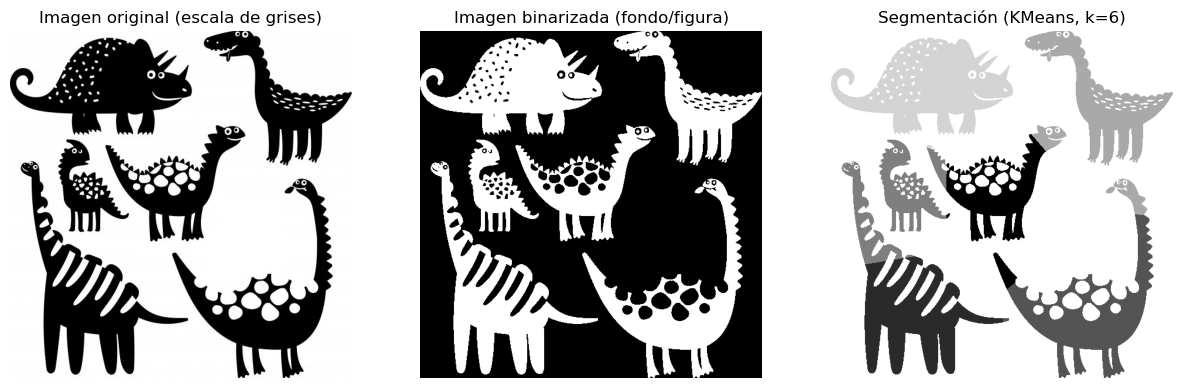

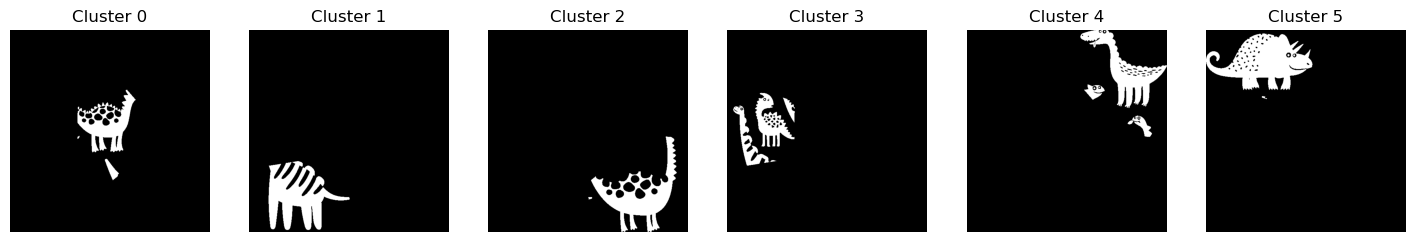

Tamaño (número de píxeles) por cluster: Counter({5: 27402, 1: 21976, 2: 20486, 4: 19385, 0: 13178, 3: 13063})


In [8]:
#Traer la imagen 
imagen_path = r"C:\Users\evapl\Desktop\danosorios.jpg"  
#Abre la imagen y la convierte en escala de grises (L=modo de imagen)
imagen = Image.open(imagen_path).convert("L") 
#Se guarda la imagen en un arreglo
arr = np.array(imagen)

# Metodo umbral, imagen binaria(bin_arr), astype Negro=1(Figura), Blanco=0(fondo)
thresh = threshold_otsu(arr)
bin_arr = (arr <= thresh).astype(np.uint8)

#Coordenadas
coords = np.column_stack(np.nonzero(bin_arr))
print("Número de píxeles negros:", len(coords))

# Se buscan las regiones conectadas
#Propiedades props(analiza num de pixeles, coordenadas del centro,etc.)
labeled = label(bin_arr, connectivity=2)
props = regionprops(labeled)

#Se calcula el área minima de la figura
#número de figuras estimadas
min_area = max(20, int(0.002 * arr.size))
n_components = sum(1 for p in props if p.area >= min_area)
k = max(1, min(n_components, 10))  
print("Número de figuras estimadas:", k)

#Algortimo kmeas
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(coords)
labels = kmeans.labels_

# imagen segmentada
segmented = np.ones_like(arr, dtype=np.uint8) * 255  
cluster_intensities = np.linspace(50, 220, k).astype(np.uint8)

for i, (y, x) in enumerate(coords):
    lab = labels[i]
    segmented[y, x] = cluster_intensities[lab]

#Mostrar resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# imgen original
axs[0].imshow(arr, cmap="gray")
axs[0].set_title("Imagen original (escala de grises)")
axs[0].axis("off")

# imagen binarizada
axs[1].imshow(bin_arr, cmap="gray")
axs[1].set_title("Imagen binarizada (fondo/figura)")
axs[1].axis("off")

# imagen segmentada con algortimo KMeans
axs[2].imshow(segmented, cmap="gray")
axs[2].set_title(f"Segmentación (KMeans, k={k})")
axs[2].axis("off")
plt.show()

#Mostrar cluster
fig2, axs2 = plt.subplots(1, k, figsize=(3*k, 3))
for cluster_id in range(k):
    mask = np.zeros_like(arr, dtype=bool)
    mask_coords = coords[labels == cluster_id]
    mask[mask_coords[:,0], mask_coords[:,1]] = True
    axs2[cluster_id].imshow(mask, cmap="gray")
    axs2[cluster_id].set_title(f"Cluster {cluster_id}")
    axs2[cluster_id].axis("off")
plt.show()

# Estadísticas
cnt = Counter(labels.tolist())
print("Tamaño (número de píxeles) por cluster:", cnt)



Número de píxeles negros: 80385
Número de figuras estimadas: 10


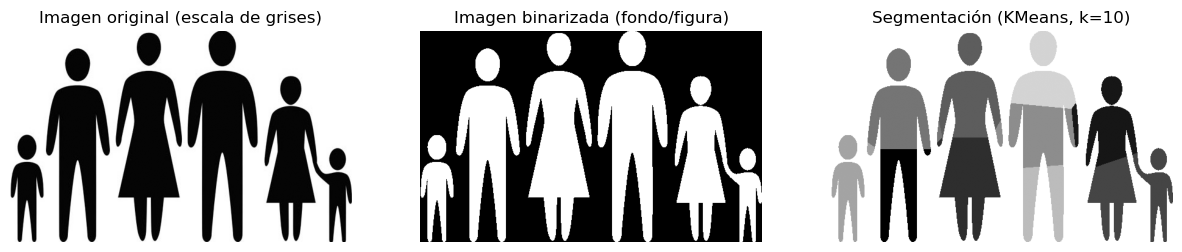

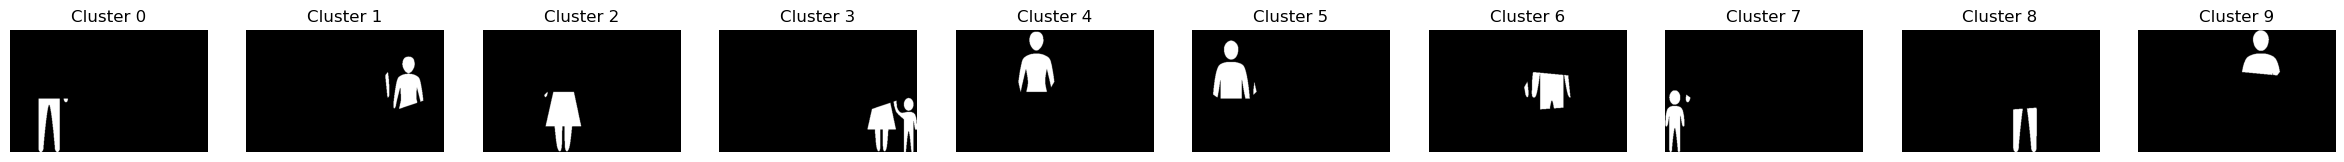

Tamaño (número de píxeles) por cluster: Counter({5: 10522, 2: 10219, 3: 10104, 4: 9707, 6: 8470, 1: 7545, 9: 7189, 0: 6356, 7: 5291, 8: 4982})


In [9]:
#Traer imagen
imagen_path = r"C:\Users\evapl\Desktop\familia.jpg" 

#Abre la imagen y la convierte en escala de grises (L=modo de imagen)
imagen = Image.open(imagen_path).convert("L") 
#Se guarda la imagen en un arreglo
arr = np.array(imagen)

# Metodo umbral, imagen binaria(bin_arr), astype Negro=1(Figura), Blanco=0(fondo)
thresh = threshold_otsu(arr)
bin_arr = (arr <= thresh).astype(np.uint8)

#Coordenadas
coords = np.column_stack(np.nonzero(bin_arr))
print("Número de píxeles negros:", len(coords))

# Se buscan las regiones conectadas
#Propiedades props(analiza num de pixeles, coordenadas del centro,etc.)
labeled = label(bin_arr, connectivity=2)
props = regionprops(labeled)

#Se calcula el área minima de la figura
#número de figuras estimadas
min_area = max(20, int(0.002 * arr.size))
n_components = sum(1 for p in props if p.area >= min_area)
k = max(1, min(n_components, 10))  
print("Número de figuras estimadas:", k)

#Algortimo kmeas
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(coords)
labels = kmeans.labels_

# imagen segmentada
segmented = np.ones_like(arr, dtype=np.uint8) * 255  
cluster_intensities = np.linspace(50, 220, k).astype(np.uint8)

for i, (y, x) in enumerate(coords):
    lab = labels[i]
    segmented[y, x] = cluster_intensities[lab]

#Mostrar resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# imgen original
axs[0].imshow(arr, cmap="gray")
axs[0].set_title("Imagen original (escala de grises)")
axs[0].axis("off")

# imagen binarizada
axs[1].imshow(bin_arr, cmap="gray")
axs[1].set_title("Imagen binarizada (fondo/figura)")
axs[1].axis("off")

# imagen segmentada con algortimo KMeans
axs[2].imshow(segmented, cmap="gray")
axs[2].set_title(f"Segmentación (KMeans, k={k})")
axs[2].axis("off")
plt.show()

#Mostrar cluster
fig2, axs2 = plt.subplots(1, k, figsize=(3*k, 3))
for cluster_id in range(k):
    mask = np.zeros_like(arr, dtype=bool)
    mask_coords = coords[labels == cluster_id]
    mask[mask_coords[:,0], mask_coords[:,1]] = True
    axs2[cluster_id].imshow(mask, cmap="gray")
    axs2[cluster_id].set_title(f"Cluster {cluster_id}")
    axs2[cluster_id].axis("off")
plt.show()

# Estadísticas
cnt = Counter(labels.tolist())
print("Tamaño (número de píxeles) por cluster:", cnt)


Número de píxeles negros: 868844
Número de figuras estimadas: 10


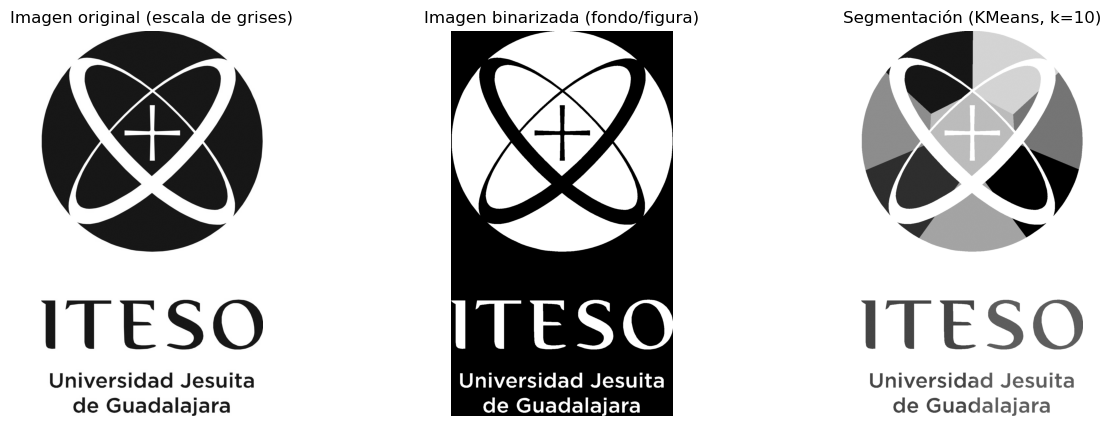

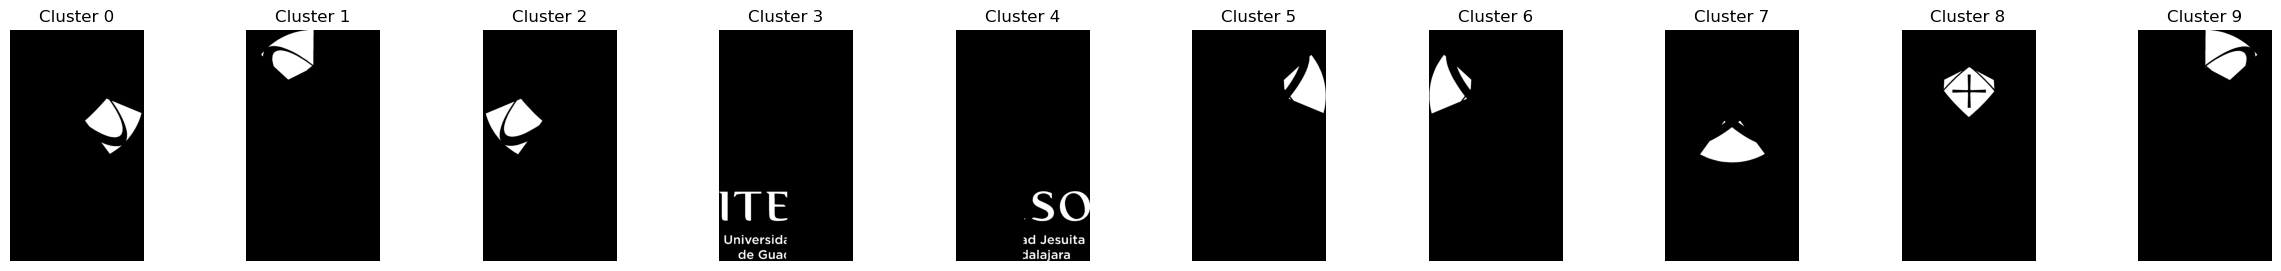

Tamaño (número de píxeles) por cluster: Counter({1: 100503, 9: 99641, 0: 93302, 7: 93246, 2: 92882, 8: 90278, 6: 84669, 5: 83175, 3: 66376, 4: 64772})


In [12]:
#Traer la imagen 
imagen_path = r"C:\Users\evapl\Desktop\Introduccion_Aprendizaje_Automatico_2025\iteso.jpg "  
#Abre la imagen y la convierte en escala de grises (L=modo de imagen)
imagen = Image.open(imagen_path).convert("L") 
#Se guarda la imagen en un arreglo
arr = np.array(imagen)

# Metodo umbral, imagen binaria(bin_arr), astype Negro=1(Figura), Blanco=0(fondo)
thresh = threshold_otsu(arr)
bin_arr = (arr <= thresh).astype(np.uint8)

#Coordenadas
coords = np.column_stack(np.nonzero(bin_arr))
print("Número de píxeles negros:", len(coords))

# Se buscan las regiones conectadas
#Propiedades props(analiza num de pixeles, coordenadas del centro,etc.)
labeled = label(bin_arr, connectivity=2)
props = regionprops(labeled)

#Se calcula el área minima de la figura
#número de figuras estimadas
min_area = max(20, int(0.002 * arr.size))
n_components = sum(1 for p in props if p.area >= min_area)
k = max(1, min(n_components, 10))  
print("Número de figuras estimadas:", k)

#Algortimo kmeas
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(coords)
labels = kmeans.labels_

# imagen segmentada
segmented = np.ones_like(arr, dtype=np.uint8) * 255  
cluster_intensities = np.linspace(50, 220, k).astype(np.uint8)

for i, (y, x) in enumerate(coords):
    lab = labels[i]
    segmented[y, x] = cluster_intensities[lab]

#Mostrar resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# imgen original
axs[0].imshow(arr, cmap="gray")
axs[0].set_title("Imagen original (escala de grises)")
axs[0].axis("off")

# imagen binarizada
axs[1].imshow(bin_arr, cmap="gray")
axs[1].set_title("Imagen binarizada (fondo/figura)")
axs[1].axis("off")

# imagen segmentada con algortimo KMeans
axs[2].imshow(segmented, cmap="gray")
axs[2].set_title(f"Segmentación (KMeans, k={k})")
axs[2].axis("off")
plt.show()

#Mostrar cluster
fig2, axs2 = plt.subplots(1, k, figsize=(3*k, 3))
for cluster_id in range(k):
    mask = np.zeros_like(arr, dtype=bool)
    mask_coords = coords[labels == cluster_id]
    mask[mask_coords[:,0], mask_coords[:,1]] = True
    axs2[cluster_id].imshow(mask, cmap="gray")
    axs2[cluster_id].set_title(f"Cluster {cluster_id}")
    axs2[cluster_id].axis("off")
plt.show()
# Estadísticas
cnt = Counter(labels.tolist())
print("Tamaño (número de píxeles) por cluster:", cnt)


Número de píxeles negros: 85397
Número de figuras estimadas: 10


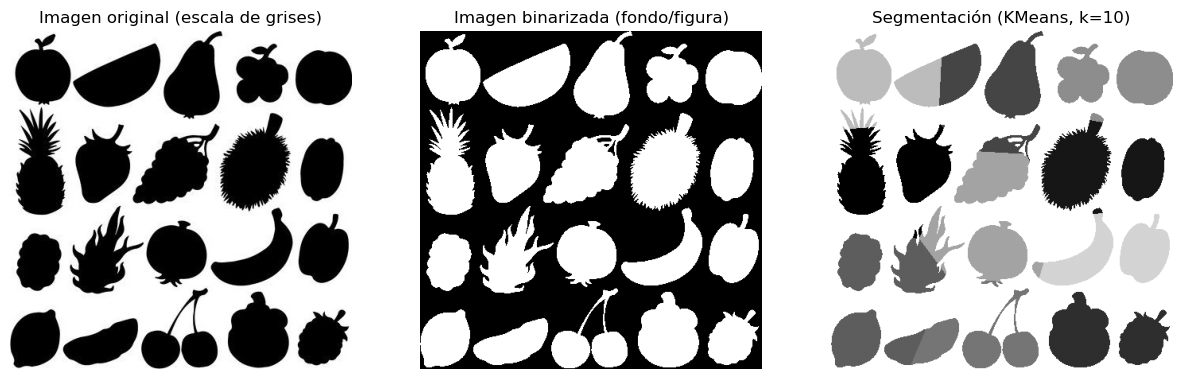

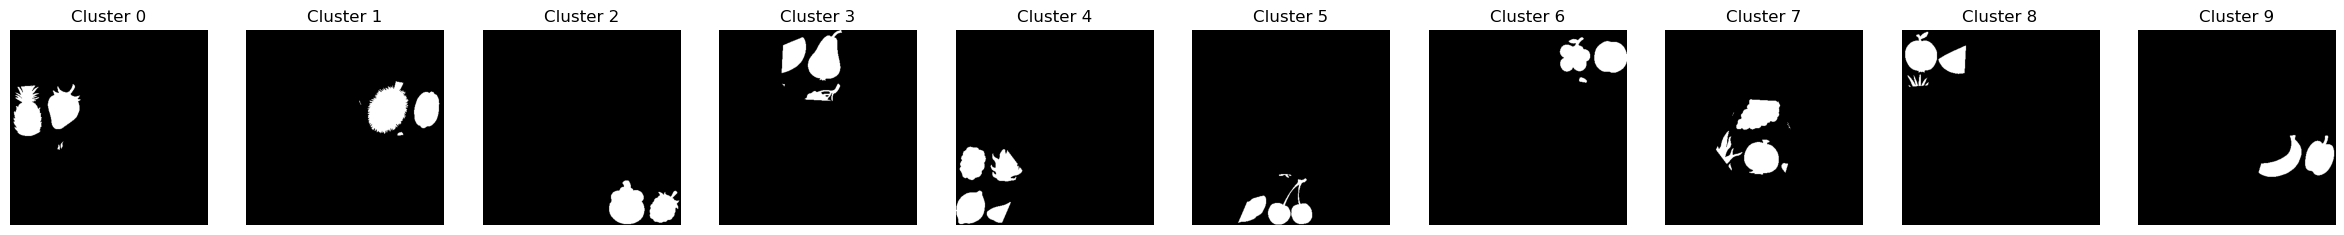

Tamaño (número de píxeles) por cluster: Counter({4: 10793, 7: 10219, 1: 10128, 0: 9457, 3: 8959, 2: 8206, 6: 7442, 9: 7252, 8: 6906, 5: 6035})


In [4]:
#Traer la imagen   
imagen_path = r"C:\Users\evapl\Desktop\Introduccion_Aprendizaje_Automatico_2025\frutas.jpg "
#Abre la imagen y la convierte en escala de grises (L=modo de imagen)
imagen = Image.open(imagen_path).convert("L") 
#Se guarda la imagen en un arreglo
arr = np.array(imagen)

# Metodo umbral, imagen binaria(bin_arr), astype Negro=1(Figura), Blanco=0(fondo)
thresh = threshold_otsu(arr)
bin_arr = (arr <= thresh).astype(np.uint8)

#Coordenadas
coords = np.column_stack(np.nonzero(bin_arr))
print("Número de píxeles negros:", len(coords))

# Se buscan las regiones conectadas
#Propiedades props(analiza num de pixeles, coordenadas del centro,etc.)
labeled = label(bin_arr, connectivity=2)
props = regionprops(labeled)

#Se calcula el área minima de la figura
#número de figuras estimadas
min_area = max(20, int(0.002 * arr.size))
n_components = sum(1 for p in props if p.area >= min_area)
k = max(1, min(n_components, 10))  
print("Número de figuras estimadas:", k)

#Algortimo kmeas
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(coords)
labels = kmeans.labels_

# imagen segmentada
segmented = np.ones_like(arr, dtype=np.uint8) * 255  
cluster_intensities = np.linspace(50, 220, k).astype(np.uint8)

for i, (y, x) in enumerate(coords):
    lab = labels[i]
    segmented[y, x] = cluster_intensities[lab]

#Mostrar resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# imgen original
axs[0].imshow(arr, cmap="gray")
axs[0].set_title("Imagen original (escala de grises)")
axs[0].axis("off")

# imagen binarizada
axs[1].imshow(bin_arr, cmap="gray")
axs[1].set_title("Imagen binarizada (fondo/figura)")
axs[1].axis("off")

# imagen segmentada con algortimo KMeans
axs[2].imshow(segmented, cmap="gray")
axs[2].set_title(f"Segmentación (KMeans, k={k})")
axs[2].axis("off")
plt.show()

#Mostrar cluster
fig2, axs2 = plt.subplots(1, k, figsize=(3*k, 3))
for cluster_id in range(k):
    mask = np.zeros_like(arr, dtype=bool)
    mask_coords = coords[labels == cluster_id]
    mask[mask_coords[:,0], mask_coords[:,1]] = True
    axs2[cluster_id].imshow(mask, cmap="gray")
    axs2[cluster_id].set_title(f"Cluster {cluster_id}")
    axs2[cluster_id].axis("off")
plt.show()

# Estadísticas
cnt = Counter(labels.tolist())
print("Tamaño (número de píxeles) por cluster:", cnt)


Número de píxeles negros: 17768
Número de figuras estimadas: 10


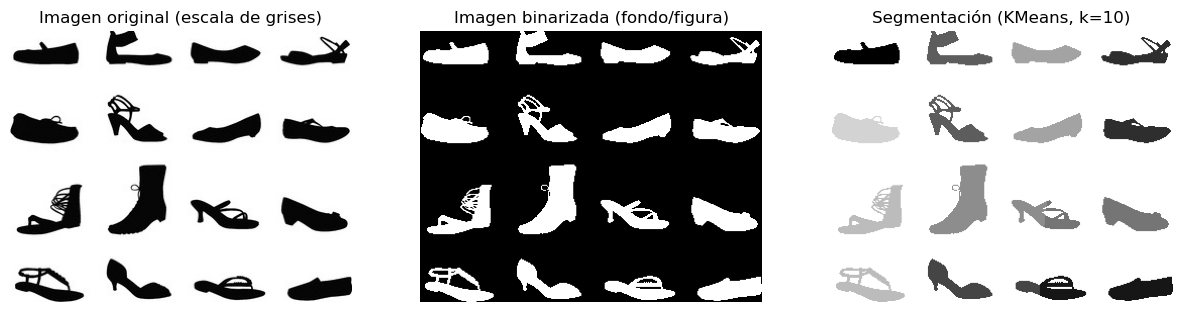

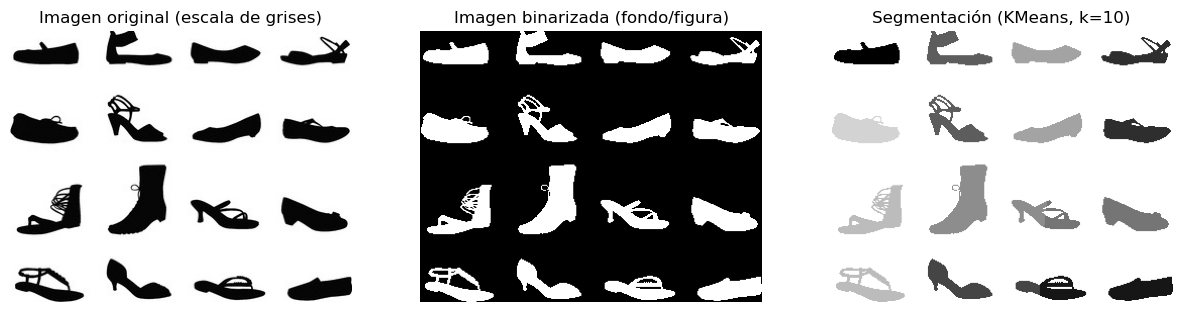

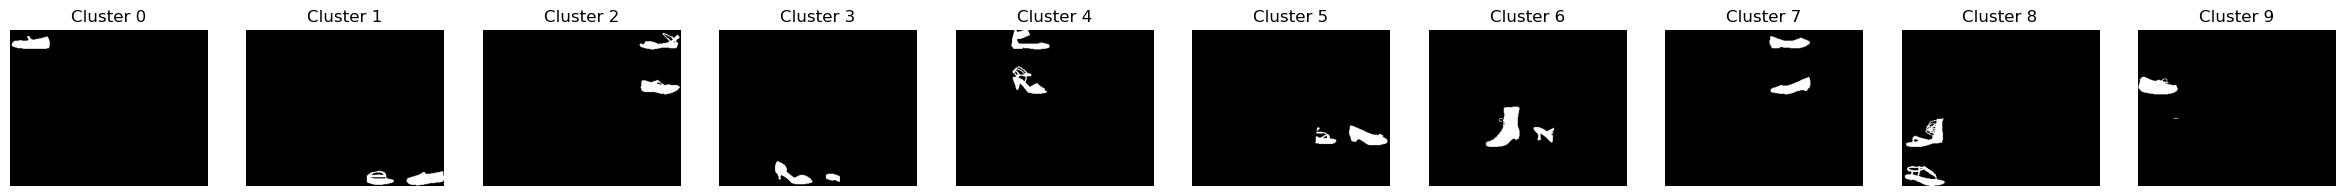

Tamaño (número de píxeles) por cluster: Counter({6: 2516, 8: 2333, 4: 2022, 7: 1993, 2: 1857, 1: 1724, 5: 1683, 9: 1401, 3: 1220, 0: 1019})


In [6]:
#Traer imagen
imagen_path = r"C:\Users\evapl\Desktop\Introduccion_Aprendizaje_Automatico_2025\zapatos.jpg " 

#Abre la imagen y la convierte en escala de grises (L=modo de imagen)
imagen = Image.open(imagen_path).convert("L") 
#Se guarda la imagen en un arreglo
arr = np.array(imagen)

# Metodo umbral, imagen binaria(bin_arr), astype Negro=1(Figura), Blanco=0(fondo)
thresh = threshold_otsu(arr)
bin_arr = (arr <= thresh).astype(np.uint8)

#Coordenadas
coords = np.column_stack(np.nonzero(bin_arr))
print("Número de píxeles negros:", len(coords))

# Se buscan las regiones conectadas
#Propiedades props(analiza num de pixeles, coordenadas del centro,etc.)
labeled = label(bin_arr, connectivity=2)
props = regionprops(labeled)

#Se calcula el área minima de la figura
#número de figuras estimadas
min_area = max(20, int(0.002 * arr.size))
n_components = sum(1 for p in props if p.area >= min_area)
k = max(1, min(n_components, 10))  
print("Número de figuras estimadas:", k)

#Algortimo kmeas
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(coords)
labels = kmeans.labels_

# imagen segmentada
segmented = np.ones_like(arr, dtype=np.uint8) * 255  
cluster_intensities = np.linspace(50, 220, k).astype(np.uint8)

for i, (y, x) in enumerate(coords):
    lab = labels[i]
    segmented[y, x] = cluster_intensities[lab]

#Mostrar resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# imgen original
axs[0].imshow(arr, cmap="gray")
axs[0].set_title("Imagen original (escala de grises)")
axs[0].axis("off")

# imagen binarizada
axs[1].imshow(bin_arr, cmap="gray")
axs[1].set_title("Imagen binarizada (fondo/figura)")
axs[1].axis("off")

# imagen segmentada con algortimo KMeans
axs[2].imshow(segmented, cmap="gray")
axs[2].set_title(f"Segmentación (KMeans, k={k})")
axs[2].axis("off")
plt.show()
#Algortimo kmeas
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(coords)
labels = kmeans.labels_

# imagen segmentada
segmented = np.ones_like(arr, dtype=np.uint8) * 255  
cluster_intensities = np.linspace(50, 220, k).astype(np.uint8)

for i, (y, x) in enumerate(coords):
    lab = labels[i]
    segmented[y, x] = cluster_intensities[lab]

#Mostrar resultados
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# imgen original
axs[0].imshow(arr, cmap="gray")
axs[0].set_title("Imagen original (escala de grises)")
axs[0].axis("off")

# imagen binarizada
axs[1].imshow(bin_arr, cmap="gray")
axs[1].set_title("Imagen binarizada (fondo/figura)")
axs[1].axis("off")

# imagen segmentada con algortimo KMeans
axs[2].imshow(segmented, cmap="gray")
axs[2].set_title(f"Segmentación (KMeans, k={k})")
axs[2].axis("off")
plt.show()

#Mostrar cluster
fig2, axs2 = plt.subplots(1, k, figsize=(3*k, 3))
for cluster_id in range(k):
    mask = np.zeros_like(arr, dtype=bool)
    mask_coords = coords[labels == cluster_id]
    mask[mask_coords[:,0], mask_coords[:,1]] = True
    axs2[cluster_id].imshow(mask, cmap="gray")
    axs2[cluster_id].set_title(f"Cluster {cluster_id}")
    axs2[cluster_id].axis("off")
plt.show()
# Estadísticas
cnt = Counter(labels.tolist())
print("Tamaño (número de píxeles) por cluster:", cnt)